In [ ]:
import requests
r = requests.get('https://store.steampowered.com/search/?sort_by=Price_DESC&filter=topsellers')

In [ ]:
from bs4 import BeautifulSoup
page = BeautifulSoup(r.text, 'html.parser')

In [ ]:
import time  # модуль для "засыпания" исполнителя, чтобы не было блокировки при парсинге
from selenium import webdriver  # Этот модуль позволяет нам управлять веб-браузером c использованием программы драйвера
from selenium.webdriver.common.keys import Keys  # модуль для нажатий по клавишам (для скроллинга)

# возвращает массив гиперссылок, начинающихся с https://store.steampowered.com/app/
def find_hrefs(page=r"https://store.steampowered.com/search/?sort_by=_ASC&filter=topsellers", number_of_pagedowns = 20, DEBUG=True):
    driver_path = r"\Users\egorf\Downloads\chromedriver.exe" # путь к драйверу Google на лок машине
    browser = webdriver.Chrome(executable_path=driver_path)
    
    browser.get(page)
    time.sleep(1)  # чтобы перед скроллингом страница успела отобразиться

    body = browser.find_element_by_tag_name("body")
    
    for _ in range(number_of_pagedowns):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.2)  # чтобы между скроллов страница успевала наполняться данными

    hrefs = browser.find_elements_by_xpath(r"//a[@href]")

    # преобразим наши ссылки в естественный вид
    for index, href in enumerate(hrefs):
        hrefs[index] = href.get_attribute("href")
        
    # отберем только нужные нам ссылки   
    needed_hrefs = []
    for href in hrefs:
        if href.startswith(r"https://store.steampowered.com/app/"):
            needed_hrefs.append(href)
    
    needed_hrefs = set(needed_hrefs)  # убираем повторяющиеся ссылки
    
    # отладка
    if DEBUG:
        # вывод итоговых гиперссылок на экран
        for href in needed_hrefs:
            print(href)
        print("Получено ссылок:", len(needed_hrefs))
    
    return needed_hrefs

In [ ]:
# копируем массив (т к мы случайно его можем изменить, а с этим трюком мы работаем не с массивом данных, а с его копией)
href_arr = find_hrefs(number_of_pagedowns=50)
href_arr_without_ads = []
for url in href_arr:
    href_arr_without_ads.append(url)

https://store.steampowered.com/app/1766730/CSGO/?snr=1_7_7_7000_150_1
https://store.steampowered.com/app/1144200/Ready_or_Not/?snr=1_7_7_7000_150_1
https://store.steampowered.com/app/1213210/Command__Conquer_Remastered_Collection/?snr=1_7_7_7000_150_10
https://store.steampowered.com/app/1147550/Not_For_Broadcast/?snr=1_7_7_7000_150_11
https://store.steampowered.com/app/221100/DayZ/?snr=1_7_7_7000_150_1
https://store.steampowered.com/app/1220010/Home_Behind_2/?snr=1_7_7_7000_150_6
https://store.steampowered.com/app/108600/Project_Zomboid/?snr=1_7_7_7000_150_1
https://store.steampowered.com/app/1021110/House_Flipper__Luxury_DLC/?snr=1_7_7_7000_150_11
https://store.steampowered.com/app/1670430/Rust__Voice_Props_Pack/?snr=1_7_7_7000_150_7
https://store.steampowered.com/app/377160/Fallout_4/?snr=1_7_7_7000_150_8
https://store.steampowered.com/app/644930/They_Are_Billions/?snr=1_7_7_7000_150_11
https://store.steampowered.com/app/1266840/The_Last_Stand_Aftermath/?snr=1_7_7_7000_150_15
https:/

In [ ]:
######################################################################
# ГЛАВНАЯ ФУНКЦИЯ:
######################################################################

In [ ]:
import requests
from bs4 import BeautifulSoup
from statistics import mean  # ср ариф для массива чисел

In [ ]:
# 21 параметр будет в нашем датасете:
names = []
genres = []
developers = []
publishers = []
franchises = []
dates = []
base_prices = []
premium_prices = []
middle_prices = []
min_systemOSs = []
min_CPUs = []
min_RAMs = []
min_GPUs = []
min_storages = []
rec_systemOSs = []
rec_CPUs = []
rec_RAMs = []
rec_GPUs = []
rec_storages = []
reviews = []
websites = []

In [ ]:
import numpy as np

In [ ]:
# ф-ия анализирует страницу конкретного приложения
COUNTER = 0
def find_info(url=r"https://store.steampowered.com/app/534380/Dying_Light_2_Stay_Human/", DEBUG=True):
    websites.append(url)
    global COUNTER
    COUNTER += 1
    print(COUNTER)
    print(url)
    g = requests.get(url)
    page = BeautifulSoup(g.text, "html.parser")
    
    if DEBUG:
        print(page.find(id="appHubAppName").text)  # название игры
        print()
    
    # INFO1
    info = page.find(id="genresAndManufacturer").text
    arr = info.split('\n')
    clear_arr = []
    for el in arr:
        if el != '':
            clear_arr.append(el)
#     print(clear_arr)
    clear_arr[0] = clear_arr[0].replace('Title: ', '')
    clear_arr[1] = clear_arr[1].replace('Genre: ', '')
    del clear_arr[2]
    del clear_arr[3]
    have_franchise = True
    try:
        if clear_arr[4] == "Franchise:":
            del clear_arr[4]
            if DEBUG:
                print("HAVE frunchise")
        else:
            have_franchise = False
            if DEBUG:
                print("DONOT have frunchise")
    except:
        while(len(clear_arr) < 5):
#             clear_arr.append("NaN")
            clear_arr.append(np.NaN)
        have_franchise = False
        if DEBUG:
            print("DONOT have frunchise")
    if have_franchise:
        if DEBUG:
            print(clear_arr)
        try:
            clear_arr[5] = clear_arr[5].replace('Release Date: ', '')
        except:
            pass
    else: 
        try:
            clear_arr[4] = clear_arr[4].replace('Release Date: ', '')
        except:
            pass
    if DEBUG:
        print(clear_arr)
        print()
    names.append(clear_arr[0])
    genres.append(clear_arr[1])
    developers.append(clear_arr[2])
    publishers.append(clear_arr[3])
    if have_franchise:
        try:
            franchises.append(clear_arr[4])
        except:
            franchises.append(np.NaN)
        try:
            dates.append(clear_arr[5])
        except:
            dates.append(np.NaN)
    else:
#         franchises.append('NaN')
        franchises.append(np.NaN)
        dates.append(clear_arr[4])
    
    # INFO2
    info2 = page.find_all(class_="game_purchase_price price")
    if DEBUG:
        print("INFO2: ", info2)  # empty?
    if not bool(info2):
        info2 = page.find_all(class_="discount_final_price")
    if not bool(info2):
        info2 = ['0']
    for index, el in enumerate(info2):
        try:
            info2[index] = el.text.strip()
        except:
            info2[index] = str(el).strip()
        info2[index] = info2[index][:-5]  # убираем ' руб.' так, т к replace с кириллицей не работает!
        try:
            info2[index] = int(float(info2[index].replace(',', '.')))
        except:
            info2[index] = np.NaN
    if DEBUG:
        try:
            print(min(info2))  # цена базового пакета игры
            print(max(info2))  # цена премиум-пакета игры
            print(int(float(mean(info2))))  # средняя цена на игру
        except:
            print('MIN')
            print('MAX')
            print('MIDDLE')
        print()
    try:
        base_prices.append(min(info2))
    except:
#         base_prices.append('NaN')
        base_prices.append(np.NaN)
    print('info2:', info2)
    try:
        if str(min(info2)) == str(max(info2)):
#             premium_prices.append('NaN')
            premium_prices.append(np.NaN)
#             middle_prices.append('NaN')
            middle_prices.append(np.NaN)
        else:   
            premium_prices.append(max(info2))
            middle_prices.append(int(mean(info2)))
    except:
        # premium_prices.append('NaN')
        premium_prices.append(np.NaN)
        # middle_prices.append('NaN')
        middle_prices.append(np.NaN)
    
    # INFO3
    info3 = page.find_all(class_="game_area_sys_req_leftCol")  # мин требования
    if not bool(info3):
        info3 = np.NaN
    else:
        info3 = info3[0]
    if DEBUG:
        try:
            print(info3.text[info3.text.find('systemOS'):info3.text.find('Processor')].replace('systemOS: ', ''))  # ОС
        except:
            print('NaN')
        try: 
            print(info3.text[info3.text.find('Processor'):info3.text.find('Memory')].replace('Processor: ', ''))  # ЦП
        except:
            print('NaN')
        try: 
            print(info3.text[info3.text.find('Memory'):info3.text.find('Graphics')].replace('Memory: ', '').replace(' GB RAM', ''))  # ОЗУ (в ГБ)
        except:
            print('NaN')
        try:
            print(info3.text[info3.text.find('Graphics'):info3.text.find('Storage')].replace('Graphics: ', ''))  # Видеокарта
        except:
            print('NaN')
        try:
            print(info3.text[info3.text.find('Storage'):].replace('Storage: ', '').replace(' GB available space ', '').replace('\n', '').strip())  # мин свободное место (в ГБ)
        except:
            print('NaN')
    try:
        var = info3.text[info3.text.find('systemOS'):info3.text.find('Processor')].replace('systemOS: ', '')
        if var != '':
            min_systemOSs.append(var)
        else:
#             min_systemOSs.append('NaN')
            min_systemOSs.append(np.NaN)
    except:
#         min_systemOSs.append('NaN')
        min_systemOSs.append(np.NaN)
    try:
        var = info3.text[info3.text.find('Processor'):info3.text.find('Memory')].replace('Processor: ', '')
        if var != '':
            min_CPUs.append(var)
        else:
#             min_CPUs.append('NaN')
            min_CPUs.append(np.NaN)
    except:
#         min_CPUs.append('NaN')
        min_CPUs.append(np.NaN)
    try:
        var = info3.text[info3.text.find('Memory'):info3.text.find('Graphics')].replace('Memory: ', '').replace(' GB RAM', '')
        if var != '':
            try:
                ram = float(var.split(' ')[0])
                if ram >= 512.0:  # т к значения могут быть в МБ
                    ram /= 1024
                ram = round(ram, 1)
                min_RAMs.append(ram)
            except:
                min_RAMs.append(np.NaN)
        else:
#             min_RAMs.append('NaN')
            min_RAMs.append(np.NaN)
    except:
#         min_RAMs.append('NaN')
        min_RAMs.append(np.NaN)
    try:
        var = info3.text[info3.text.find('Graphics'):info3.text.find('Storage')].replace('Graphics: ', '')
        if var != '':
            min_GPUs.append(var)
        else:
#             min_GPUs.append('NaN')
            min_GPUs.append(np.NaN)
    except:
#         min_GPUs.append('NaN')
        min_GPUs.append(np.NaN)
    try:
        var = info3.text[info3.text.find('Storage'):].replace('Storage: ', '').replace(' GB available space ', '').replace('\n', '').strip()
        if var != '':
            try:
                storage = float(var.split(' ')[0])
                if storage >=159:
                    storage /= 1024
                storage = round(storage, 1)
                min_storages.append(storage)
            except:
                min_storages.append(np.NaN)
        else:
#             min_storages.append('NaN')
            min_storages.append(np.NaN)
    except:
#         min_storages.append('NaN')
        min_storages.append(np.NaN)
    
    # INFO4
    info3 = page.find_all(class_="game_area_sys_req_rightCol")  # рекомендованные требования
    if not bool(info3):
        info3 = np.NaN
    else:
        info3 = info3[0]
    if DEBUG:
        try:
            print(info3.text[info3.text.find('systemOS'):info3.text.find('Processor')].replace('systemOS: ', ''))  # ОС
        except:
            print('NaN')
        try:
            print(info3.text[info3.text.find('Processor'):info3.text.find('Memory')].replace('Processor: ', ''))  # ЦП
        except:
            print('NaN')
        try:
            print(info3.text[info3.text.find('Memory'):info3.text.find('Graphics')].replace('Memory: ', '').replace(' GB RAM', ''))  # ОЗУ (в ГБ)
        except:
            print('NaN')
        try:
            print(info3.text[info3.text.find('Graphics'):info3.text.find('Storage')].replace('Graphics: ', ''))  # Видеокарта
        except:
            print('NaN')
        try:
            print(info3.text[info3.text.find('Storage'):].replace('Storage: ', '').replace(' GB available space ', '').replace('\n', '').strip())  # мин свободное место (в ГБ)
        except:
            print('NaN')
    try:
        var = info3.text[info3.text.find('systemOS'):info3.text.find('Processor')].replace('systemOS: ', '')
        if var != '':
            rec_systemOSs.append(var)
        else:
#             rec_systemOSs.append('NaN')
            rec_systemOSs.append(np.NaN)
    except:
#          rec_systemOSs.append('NaN')
         rec_systemOSs.append(np.NaN)
    try:
        var = info3.text[info3.text.find('Processor'):info3.text.find('Memory')].replace('Processor: ', '')
        if var != '':
            rec_CPUs.append(var)
        else:
#             rec_CPUs.append('NaN')
            rec_CPUs.append(np.NaN)
    except:
#         rec_CPUs.append('NaN')
        rec_CPUs.append(np.NaN)
    try:
        var = info3.text[info3.text.find('Memory'):info3.text.find('Graphics')].replace('Memory: ', '').replace(' GB RAM', '')
        if var != '':
            try:
                ram = float(var.split(' ')[0])
                if ram >= 512.0:  # т к значения могут быть в МБ
                    ram /= 1024
                ram = round(ram, 1)
                rec_RAMs.append(ram)
            except:
                rec_RAMs.append(np.NaN)
        else:
#             rec_RAMs.append('NaN')
            rec_RAMs.append(np.NaN)
    except:
#         rec_RAMs.append('NaN')
        rec_RAMs.append(np.NaN)
    try:
        var = info3.text[info3.text.find('Graphics'):info3.text.find('Storage')].replace('Graphics: ', '')
        if var != '':
            rec_GPUs.append(var)
        else:
#             rec_GPUs.append('NaN')
            rec_GPUs.append(np.NaN)
    except:
#         rec_GPUs.append('NaN')
        rec_GPUs.append(np.NaN)
    try:
        var = info3.text[info3.text.find('Storage'):].replace('Storage: ', '').replace(' GB available space ', '').replace('\n', '').strip()
        if var != '':
            try:
                storage = float(var.split(' ')[0])
                if storage >=159:
                    storage /= 1024
                storage = round(storage, 1)
                rec_storages.append(storage)
            except:
                rec_storages.append(np.NaN)
        else:
#             rec_storages.append('NaN')
            rec_storages.append(np.NaN)
    except:
#         rec_storages.append('NaN')
        rec_storages.append(np.NaN)
    
    # INFO5
    info5 = page.find_all(class_="summary column")  # обзоры, краткая информауция
#     print('INFO5:')
    if not bool(info5):
        info5 = np.NaN
    else:
        info5 = info5[0]
#     print(info5)
    if DEBUG and info5 != np.NaN:
        try:
            print(info5.text.replace('\t', '').replace('\n', '').replace('\r', ''))
        except:
            print('NaN')
    elif DEBUG:
        print('NaN')
    try:
        reviews.append(info5.text.replace('\t', '').replace('\n', '').replace('\r', ''))
    except:
#         reviews.append('NaN')
        reviews.append(np.NaN)
    
    


In [ ]:
# rec <=> recommended
diction = {'Name': names, 'Genre': genres, 'Developer': developers, 'Publisher': publishers, 'Franchise': franchises, 
           'Date': dates, 'BasePrice': base_prices, 'PremiumPrice': premium_prices, 'MiddlePrice': middle_prices,
           'minOS': min_systemOSs, 'minCPU': min_CPUs, 'minRAM(GB)': min_RAMs, 'minGPU': min_GPUs, 'minStorage(GB)': min_storages,
           'recOS': rec_systemOSs, 'recCPU': rec_CPUs, 'recRAM(GB)': rec_RAMs, 'recGPU': rec_GPUs, 'recStorage(GB)': rec_storages,
           'Review': reviews, 'Website': websites}
diction

# len(diction) = 21

{'Name': [],
 'Genre': [],
 'Developer': [],
 'Publisher': [],
 'Franchise': [],
 'Date': [],
 'BasePrice': [],
 'PremiumPrice': [],
 'MiddlePrice': [],
 'minOS': [],
 'minCPU': [],
 'minRAM(GB)': [],
 'minGPU': [],
 'minStorage(GB)': [],
 'recOS': [],
 'recCPU': [],
 'recRAM(GB)': [],
 'recGPU': [],
 'recStorage(GB)': [],
 'Review': [],
 'Website': []}

In [ ]:
# черный список адресов
black_list = []
black_list.append(r"https://store.steampowered.com/app/1149640/RimWorld__Royalty/")
black_list.append(r"https://store.steampowered.com/app/1289670/EA_Play/?snr=1_7_7_7000_150_1")
black_list.append(r"https://store.steampowered.com/app/219740/Dont_Starve/?snr=1_7_7_7000_150_15")

In [ ]:
# парсим 622 игры
for URL in href_arr_without_ads:
    if URL not in black_list:
        find_info(url=URL, DEBUG=False)
diction

1
https://store.steampowered.com/app/1766730/CSGO/?snr=1_7_7_7000_150_1
info2: [1080]
2
https://store.steampowered.com/app/1144200/Ready_or_Not/?snr=1_7_7_7000_150_1
info2: [1299, 2598]
3
https://store.steampowered.com/app/936790/Life_is_Strange_True_Colors/?snr=1_7_7_7000_150_9
info2: [1999, 150]
4
https://store.steampowered.com/app/1509510/Settlement_Survival/?snr=1_7_7_7000_150_11
info2: [599]
5
https://store.steampowered.com/app/221100/DayZ/?snr=1_7_7_7000_150_1
info2: [1199, 349]
6
https://store.steampowered.com/app/1220010/Home_Behind_2/?snr=1_7_7_7000_150_6
info2: [515, 220]
7
https://store.steampowered.com/app/108600/Project_Zomboid/?snr=1_7_7_7000_150_1
info2: [435, 1085]
8
https://store.steampowered.com/app/355880/The_Witcher_3_Wild_Hunt__Expansion_Pass/?snr=1_7_7_7000_150_15
info2: [999]
9
https://store.steampowered.com/app/1021110/House_Flipper__Luxury_DLC/?snr=1_7_7_7000_150_11
info2: [360]
10
https://store.steampowered.com/app/67370/The_Darkness_II/?snr=1_7_7_7000_150_9
i

{'Name': ['CS:GO - Operation Riptide',
  'Ready or Not',
  'Life is Strange: True Colors',
  'Settlement Survival',
  'DayZ',
  'Home Behind 2',
  'Project Zomboid',
  'The Witcher 3: Wild Hunt - Expansion Pass',
  'House Flipper - Luxury DLC',
  'The Darkness II',
  'Outlast 2',
  'Mechs V Kaijus - Tower Defense',
  '7 Days to Die',
  'They Are Billions',
  'Age of Empires III: Definitive Edition',
  'Door Kickers: Action Squad',
  'Dyson Sphere Program',
  'Car Mechanic Simulator 2021',
  'Tavern Master',
  'Stormworks: Search and Destroy',
  'Pathfinder: Wrath of the Righteous',
  'Grand Theft Auto V - Criminal Enterprise Starter Pack',
  'Hero Siege - Cyberpunk Samurai (Class + Skin)',
  'The Great Ace Attorney Chronicles',
  'Biped',
  'STAR WARS™ Battlefront',
  'LEGO® Star Wars™: The Skywalker Saga',
  'Deep Rock Galactic',
  'Little Nightmares',
  'DCS: Fw 190 D-9 Dora',
  'Movavi Video Editor Plus 2022 - Video Editing Software',
  'TOGETHER BnB',
  'FIFA 22',
  'Backbone',
  '

In [ ]:
# проврека размеров массивов в словаре
for key in diction:
    print(key, '->', len(diction[key]))

Name -> 622
Genre -> 622
Developer -> 622
Publisher -> 622
Franchise -> 622
Date -> 622
BasePrice -> 622
PremiumPrice -> 622
MiddlePrice -> 622
minOS -> 622
minCPU -> 622
minRAM(GB) -> 622
minGPU -> 622
minStorage(GB) -> 622
recOS -> 622
recCPU -> 622
recRAM(GB) -> 622
recGPU -> 622
recStorage(GB) -> 622
Review -> 622
Website -> 622


In [ ]:
###################################################################################################################

In [ ]:
import pandas as pd
nft = pd.DataFrame(diction)
nft.tail(20)
# примечание: NaN значит что данных по данному показателю данной игры нет, т к эта игра - новинка!

,Name,Genre,Developer,Publisher,Franchise,Date,BasePrice,PremiumPrice,MiddlePrice,minOS,...,minRAM(GB),minGPU,minStorage(GB),recOS,recCPU,recRAM(GB),recGPU,recStorage(GB),Review,Website
602,Counter-Strike: Source,Action,Valve,Valve,NaN,"1 Nov, 2004",259.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Overwhelmingly Positive(1,504)- 96% of the 1,5...",https://store.steampowered.com/app/240/Counter...
603,Darksiders Genesis,"Action, Adventure",Airship Syndicate,THQ Nordic,Darksiders,"5 Dec, 2019",195.0,999.0,597.0,"Windows 7, 8, Windows 10 (64 bit)",...,4.0,NVIDIA GeForce GTX 960DirectX: Version 11,15.0,"Windows 7, 8, Windows 10 (64 bit)",Intel Core i7-3930K (3.2 GHz)/AMD Ryzen 5 1600...,8.0,NVIDIA GeForce GTX 1060DirectX: Version 11,15.0,Mostly Positive(146)- 72% of the 146 user revi...,https://store.steampowered.com/app/710920/Dark...
604,Craft The World,"Indie, RPG, Simulation, Strategy",Dekovir Entertainment,Black Maple Games,NaN,"24 Nov, 2014",399.0,987.0,693.0,NaN,...,1.0,Intel GraphicsDirectX: Version 9.0,0.2,NaN,2.4 Ghz Dual Core CPU,4.0,"512 MB graphics memory (Radeon HD 4600, GeForc...",0.2,Very Positive(126)- 88% of the 126 user review...,https://store.steampowered.com/app/248390/Craf...
605,PAYDAY 2: Jiu Feng Smuggler Pack 4,"Action, RPG",OVERKILL - a Starbreeze Studio.,NaN,NaN,NaN,119.0,NaN,NaN,NaN,...,NaN,Graphics:Nvidia & AMD (512MB VRAM) DirectX®:9.0c,NaN,NaN,Processor:2.3 GHz Intel Quad Core Processor,NaN,Graphics:Nvidia & AMD (1GB VRAM) DirectX®:9.0c,NaN,Mostly Positive(105)- 79% of the 105 user revi...,https://store.steampowered.com/app/1901420/PAY...
606,Space Engineers,"Action, Indie, Simulation, Strategy",Keen Software House,Keen Software House,NaN,"28 Feb, 2019",435.0,1215.0,911.0,NaN,...,8.0,Geforce 750/Radeon R9 270X or higherDirectX: V...,35.0,NaN,Intel Quad Core i7 @ 4.5 GHz or higher (or AMD...,16.0,Geforce 1070 GTX / Radeon RX Vega 56 or higher...,35.0,"Very Positive(1,002)- 89% of the 1,002 user re...",https://store.steampowered.com/app/244850/Spac...
607,Movavi Video Suite 2022 Steam Edition - Video ...,"Animation & Modeling, Audio Production, Design...",Movavi Software,Movavi Software,Movavi Software,"27 Nov, 2021",2090.0,5840.0,3965.0,Microsoft® Windows® 7/8/10/11 with up-to-date ...,...,2.0,"NVIDIA® GeForce® series 8, Intel® HD Graphics ...",2.0,NaN,NaN,NaN,NaN,NaN,Mixed(13)- 53% of the 13 user reviews for this...,https://store.steampowered.com/app/1783540/Mov...
608,Solargene,"Indie, Simulation, Strategy, Early Access",Alexander Semenov,Alexander Semenov,NaN,"31 Jan, 2022",399.0,NaN,NaN,Windows 7,...,8.0,AMD Radeon HD 7900 SeriesDirectX: Version 11,18.0,Windows 10,AMD Ryzen 3 1200,16.0,GeForce GTX 1050TiDirectX: Version 11,18.0,Very Positive(128)- 86% of the 128 user review...,https://store.steampowered.com/app/1638300/Sol...
609,LEGO® City Undercover,Action,Traveller's Tales,TT Games,NaN,"4 Apr, 2017",1899.0,NaN,NaN,NaN,...,4.0,"GeForce 560 Ti (1024 MB), Radeon HD 5850 (1024...",18.0,NaN,"Intel Core i7-950 (4 * 3000) or equivalent, AM...",4.0,"GeForce GTX 660 (2048 MB), Radeon HD 7850 (204...",18.0,Very Positive(355)- 93% of the 355 user review...,https://store.steampowered.com/app/578330/LEGO...
610,Hero Siege - Avenger Paladin (Class + Skin),"Action, Adventure, Indie, Massively Multiplaye...","Elias Viglione, Jussi Kukkonen",NaN,NaN,NaN,87.0,693.0,390.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very Positive(60)- 86% of the 60 user reviews ...,https://store.steampowered.com/app/331181/Hero...
611,House Flipper,"Indie, Simulation",Empyrean,"Frozen District, PlayWay S.A.",House Flipper,"17 May, 2018",435.0,979.0,707.0,Windows 7 (64-bit) or newer,...,4.0,GeForce GTX 560 / AMD R7-260XDirectX: Version 11,6.0,Windows 10 64bit,Intel Core i5-8400 / AMD Ryzen 5 1600,8.0,GeForce GTX 970 / AMD Radeon RX 580DirectX: Ve...,6.0,"Overwhelmingly Positive(1,423)- 96% of the 1,4...",https://store.steampowered.com/app/613100/_/?s...


In [ ]:
# переносим наш датасет в Excel
writer = pd.ExcelWriter('games_final_corrected_2.xlsx')
nft.to_excel(writer, 'topsellers')
writer.save()

In [ ]:
# ЗАДАНИЕ 1
# вывести все игры подходящие для пользователей с 4 ГБ ОЗУ
# т.е. параметр minRAM <= 4
nft[nft["minRAM(GB)"] <= '4']

,Name,Genre,Developer,Publisher,Franchise,Date,BasePrice,PremiumPrice,MiddlePrice,minOS,...,minRAM(GB),minGPU,minStorage(GB),recOS,recCPU,recRAM(GB),recGPU,recStorage(GB),Review,Website
3,Settlement Survival,"Simulation, Strategy, Early Access",Gleamer Studio,Gleamer Studio,NaN,"11 Oct, 2021",599,NaN,NaN,NaN,...,4,NVDIA Geforce GTX-650 1GBDirectX: Version 11,1,NaN,I5-4590 3.3GHZ 4 Core,16,NVDIA Geforce GTX-1050Ti 4GBDirectX: Version 11,2,Very Positive(621)- 86% of the 621 user review...,https://store.steampowered.com/app/1509510/Set...
9,The Darkness II,Action,Digital Extremes,2K,NaN,"9 Feb, 2012",129,NaN,NaN,NaN,...,1.5GB RAM Hard Disk Space: 10GB Video Card: 2...,NaN,NaN,NaN,2.4 GHz Quad Core processor,2GB RAM Hard Disk Space: 10GB Video Card: 512...,NaN,NaN,Very Positive(87)- 94% of the 87 user reviews ...,https://store.steampowered.com/app/67370/The_D...
10,Outlast 2,"Action, Adventure, Indie",Red Barrels,Red Barrels,Outlast,"25 Apr, 2017",515,NaN,NaN,NaN,...,4,"1GB VRAM, NVIDIA Geforce GTX 260 / ATI Radeon ...",30 GB available spaceSound Card: DirectX Compa...,NaN,Intel Core i5,8,"1.5GB VRAM, NVIDIA Geforce GTX 660 / ATI Radeo...",30 GB available spaceSound Card: DirectX Compa...,Very Positive(906)- 91% of the 906 user review...,https://store.steampowered.com/app/414700/Outl...
11,Mechs V Kaijus - Tower Defense,"Action, Indie, Strategy",Doble Punch Games,Doble Punch Games,NaN,"4 May, 2018",251,NaN,NaN,NaN,...,1DirectX: Version 9.0cStorage: 1 GB available ...,NaN,1,NaN,Quad Core,2DirectX: Version 10Storage: 1 GB available sp...,NaN,1,Mixed(17)- 52% of the 17 user reviews in the l...,https://store.steampowered.com/app/809540/Mech...
13,They Are Billions,Strategy,Numantian Games,Numantian Games,NaN,"18 Jun, 2019",175,899,537,NaN,...,4,"Intel HD3000, Radeon, Nvidia card with shader ...",4 GB available spaceAdditional Notes: Minimum ...,NaN,INTEL. AMD 4 cores CPU at 3Ghz,8,"Radeon 7950 or above, Nvidia GTX 670 or above....",4 GB available spaceAdditional Notes: 4K Monit...,Mostly Positive(502)- 79% of the 502 user revi...,https://store.steampowered.com/app/644930/They...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Sea of Thieves,"Action, Adventure",Rare Ltd,Xbox Game Studios,NaN,"3 Jun, 2020",725,NaN,NaN,Windows 10,...,4,Nvidia GeForce GTX 650 or AMD Radeon 7750Direc...,50,Windows 10,Intel i5 4690 @ 3.5GHz or AMD FX-8150 @ 3.6 GHz,8,Nvidia GeForce GTX 770 or AMD Radeon R9 380xDi...,50,"Very Positive(6,750)- 89% of the 6,750 user re...",https://store.steampowered.com/app/1172620/Sea...
518,Borderlands: The Pre-Sequel,"Action, RPG","2K Australia, Gearbox Software, Aspyr (Linux)","2K, Aspyr (Linux)",Borderlands,"14 Oct, 2014",1494,NaN,NaN,NaN,...,2048 MB RAM,NVIDIA GeForce 8500 / ATI Radeon HD 2600Direct...,13 GB available spaceSound Card: DirectX 9 Com...,NaN,2.3 GHz Quad Core processor,2048 MB RAM,NVIDIA GeForce GTX 560 / ATI Radeon HD 5850Dir...,20 GB available spaceSound Card: DirectX 9.0 c...,Very Positive(200)- 82% of the 200 user review...,https://store.steampowered.com/app/261640/Bord...
524,XCOM 2: Reinforcement Pack,Strategy,"Firaxis Games, Feral Interactive (Mac), Feral ...","2K, Feral Interactive (Mac), Feral Interactive...",XCOM,"4 Feb, 2016",849,NaN,NaN,NaN,...,4,"1GB ATI Radeon HD 5770, 1GB NVIDIA GeForce GTX...",45 GB available spaceSound Card: DirectX compa...,NaN,3GHz Quad Core,8,"2GB ATI Radeon HD 7970, 2GB NVIDIA GeForce GTX...",45 GB available spaceSound Card: DirectX compa...,Mixed(314)- 59% of the 314 user reviews for th...,https://store.steampowered.com/app/426321/XCOM...
528,The Elder Scrolls Online: High Isle,"Action, Adventure, Massively Multiplayer, RPG",Zenimax Online Studios,Bethesda Softworks,The Elder Scrolls Online,"6 Jun, 2022",1599,3199,2299,NaN,...,3,Direct X 11.0 compliant video card with 1GB RA...,85 GB available spaceSound Card: DirectX compa...,NaN,Intel® Core i5 2300 or AMD FX4350,8,Direct X 11.0 compliant video card with 2GB RA...,85 GB avai

In [ ]:
# Задание 2
# посчитать игры класса "премиум": сколько из 532 игр стоят больше 2 тыс рублей
nft = nft.dropna()
nft
# nft['BasePrice'] = nft['BasePrice'].dropna().astype('int64')
# nft[nft["BasePrice"] >= '2000']

,Name,Genre,Developer,Publisher,Franchise,Date,BasePrice,PremiumPrice,MiddlePrice,minOS,...,minRAM(GB),minGPU,minStorage(GB),recOS,recCPU,recRAM(GB),recGPU,recStorage(GB),Review,Website
2,Life is Strange: True Colors,"Action, Adventure",Deck Nine,Square Enix,Life is Strange,"9 Sep, 2021",150.0,1999.0,1074.0,Windows 10 64-bit,...,6.0,"Radeon HD 7790, 2 GB / GeForce GTX 750Ti, 2 GB...",30.0,Windows 10 64-bit,"AMD FX-8350, 4.00 GHz / Intel Core i5-3470, 3....",8.0,"Radeon RX 590, 8 GB / GeForce GTX 1060, 6 GBDi...",30.0,Very Positive(333)- 87% of the 333 user review...,https://store.steampowered.com/app/936790/Life...
14,Age of Empires III: Definitive Edition,Strategy,"Tantalus Media, Forgotten Empires",Xbox Game Studios,Age of Empires,"15 Oct, 2020",435.0,900.0,667.0,Windows 10 version 18362.0 or higher,...,8.0,"GeForce GT 430, Radeon HD 5570, or Intel HD 44...",42.0,Windows 10 version 18362.0 or higher,Intel i5-3300 @ 3.0GHz or AMD FX-8350 or equiv...,16.0,GeForce GTX 980 or Radeon R9 Fury or equivalen...,42.0,Very Positive(582)- 86% of the 582 user review...,https://store.steampowered.com/app/933110/Age_...
20,Pathfinder: Wrath of the Righteous,"Adventure, Indie, RPG, Strategy",Owlcat Games,"META Publishing, Owlcat Games","Owlcat Games, META Publishing","2 Sep, 2021",1498.0,1499.0,1498.0,Windows 7,...,6.0,NVIDIA GeForce 940M,50.0,Windows 10,Intel Core i7 CPU 920 @ 2.67GHz,8.0,NVIDIA GeForce GTX 1050 Ti,50.0,Very Positive(640)- 82% of the 640 user review...,https://store.steampowered.com/app/1184370/Pat...
27,Deep Rock Galactic,Action,Ghost Ship Games,Coffee Stain Publishing,Coffee Stain Publishing,"13 May, 2020",799.0,1594.0,1196.0,Windows 7 64 Bit,...,6.0,NVIDIA GeForce GTX 460 or AMD Radeon HD 5770 /...,3.0,Windows 10 64 Bit,2.4 GHz Quad Core,8.0,NVIDIA 970 / AMD Radeon 290DirectX: Version 11...,3.0,"Overwhelmingly Positive(3,207)- 96% of the 3,2...",https://store.steampowered.com/app/548430/Deep...
28,Little Nightmares,Adventure,Tarsier Studios,BANDAI NAMCO Entertainment,BANDAI NAMCO Entertainment,"27 Apr, 2017",849.0,1613.0,1237.0,"Windows 7, 64-bit",...,4.0,Nvidia GTX 460DirectX: Version 11Network: Broa...,10.0,"Windows 7, 64-bit",Intel CPU Core i7,8.0,Nvidia GPU GeForce GTX 660DirectX: Version 11...,10.0,Overwhelmingly Positive(539)- 95% of the 539 u...,https://store.steampowered.com/app/424840/Litt...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,Valheim,"Action, Adventure, Indie, RPG, Early Access",Iron Gate AB,Coffee Stain Publishing,Coffee Stain Publishing,"2 Feb, 2021",195.0,435.0,315.0,Windows 7 or later,...,8.0,GeForce GTX 950 or Radeon HD 7970DirectX: Vers...,1.0,Windows 7 or later,i5 3GHz or Ryzen 5 3GHz,16.0,GeForce GTX 1060 or Radeon RX 580DirectX: Vers...,1.0,"Very Positive(7,015)- 92% of the 7,015 user re...",https://store.steampowered.com/app/892970/Valh...
586,X4: Foundations,"Action, Simulation, Strategy",Egosoft,Egosoft,X,"30 Nov, 2018",1690.0,2124.0,1907.0,"Windows 10 (64-bit), Windows 8.1 (64-bit), Win...",...,8.0,Nvidia GTX 780/970 or AMD equivalent (Vulkan s...,15.0,Windows 10 (64-bit),Intel Core i7-6700 or AMD equivalent,16.0,Nvidia GTX 1070 or AMD equivalent (Vulkan supp...,20.0,Mostly Positive(222)- 77% of the 222 user revi...,https://store.steampowered.com/app/392160/X4_F...
587,SCUM,"Action, Adventure, Indie, Massively Multiplaye...",Gamepires,Gamepires,Gamepires,"29 Aug, 2018",518.0,900.0,709.0,Windows 10 64-bit,...,10.0,NVIDIA GeForce GTX 1060 3GB / AMD Radeon RX 48...,70.0,Windows 10 64-bit,Intel Core i5-6600K / AMD Ryzen 5 1600,16.0,NVIDIA GeForce GTX 1070 / AMD Radeon RX 580Dir...,70.0,Very Positive(968)- 83% of the 968 user review...,https://store.steampowered.com/app/513710/SCUM...
603,Darksiders Genesis,"Action, Adventure",Airship Syndicate,THQ Nordic,Darksiders,"5 Dec, 2019",195.0,999.0,597.0,"Windows 7, 8, Windows 10 (64 bit)",...,4.0,NVIDIA GeForce GTX 960DirectX: Version 11,15.0,"Windows 7, 8, Windows 10 (64 bit)",Intel Core i7-3930K (3.2

In [ ]:
# читаем из excel наш датасет
nft_dataset = pd.read_excel('games_final_corrected_2_new.xlsx', index_col='Index')
nft_dataset

,Name,Genre,Developer,Publisher,Franchise,Date,BasePrice,PremiumPrice,MiddlePrice,minOS,...,minRAM(GB),minGPU,minStorage(GB),recOS,recCPU,recRAM(GB),recGPU,recStorage(GB),Review,Website
Index,,,,,,,,,,,,,,,,,,,,,
0,CS:GO - Operation Riptide,"Action, Free to Play",Valve,Valve,NaN,"21 Sep, 2021",1080.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No user reviews,https://store.steampowered.com/app/1766730/CSG...
1,Ready or Not,"Action, Adventure, Indie, Early Access",VOID Interactive,VOID Interactive,NaN,"17 Dec, 2021",1299.0,2598.0,1948.0,"64-bit Windows 7, Windows 8.1, Windows 10",...,8.0,NVIDIA GeForce GTX 960 2GB / AMD Radeon R7 370...,50.0,64-bit Windows 10,AMD Ryzen 5-1600 / Intel Core i5-7600K,8.0,Nvidia GTX 1060 6GB or betterDirectX: Version 11,50.0,"Very Positive(7,445)- 93% of the 7,445 user re...",https://store.steampowered.com/app/1144200/Rea...
2,Life is Strange: True Colors,"Action, Adventure",Deck Nine,Square Enix,Life is Strange,"9 Sep, 2021",150.0,1999.0,1074.0,Windows 10 64-bit,...,6.0,"Radeon HD 7790, 2 GB / GeForce GTX 750Ti, 2 GB...",30.0,Windows 10 64-bit,"AMD FX-8350, 4.00 GHz / Intel Core i5-3470, 3....",8.0,"Radeon RX 590, 8 GB / GeForce GTX 1060, 6 GBDi...",30.0,Very Positive(333)- 87% of the 333 user review...,https://store.steampowered.com/app/936790/Life...
3,Settlement Survival,"Simulation, Strategy, Early Access",Gleamer Studio,Gleamer Studio,NaN,"11 Oct, 2021",599.0,NaN,NaN,NaN,...,4.0,NVDIA Geforce GTX-650 1GBDirectX: Version 11,1.0,NaN,I5-4590 3.3GHZ 4 Core,16.0,NVDIA Geforce GTX-1050Ti 4GBDirectX: Version 11,2.0,Very Positive(567)- 86% of the 567 user review...,https://store.steampowered.com/app/1509510/Set...
4,DayZ,"Action, Adventure, Massively Multiplayer",Bohemia Interactive,Bohemia Interactive,NaN,"13 Dec, 2018",349.0,1199.0,774.0,NaN,...,8.0,NVIDIA GeForce GTX 760 or AMD R9 270XDirectX: ...,16.0,NaN,Intel Core i5-6600K or AMD R5 1600X,12.0,NVIDIA GeForce GTX 1060 or AMD RX 580DirectX: ...,25.0,"Very Positive(3,367)- 87% of the 3,367 user re...",https://store.steampowered.com/app/221100/DayZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,Baldur's Gate 3,"Adventure, RPG, Strategy, Early Access",Larian Studios,Larian Studios,Baldur's Gate,"6 Oct, 2020",1999.0,NaN,NaN,Windows 7 SP1 64-bit,...,8.0,Nvidia GTX 780 / AMD Radeon R9 280XDirectX: Ve...,150.0,Windows 10 64-bit,Intel i7 4770k / AMD Ryzen 5 1500X,16.0,Nvidia GTX 1060 6GB / AMD RX580DirectX: Versio...,150.0,Very Positive(839)- 80% of the 839 user review...,https://store.steampowered.com/app/1086940/Bal...
618,Destiny 2: Triumphant Silver Bundle,"Action, Adventure, Free to Play",Bungie,Bungie,Destiny,"7 Dec, 2021",1094.0,NaN,NaN,NaN,...,6.0,NVIDIA® GeForce® GTX 660 2GB or GTX 1050 2GB /...,105.0,NaN,Processor Intel® Core™ i5 2400 3.4 GHz or i5 7...,8.0,NVIDIA® GeForce® GTX 970 4GB or GTX 1060 6GB /...,105.0,Mixed(89)- 61% of the 89 user reviews for this...,https://store.steampowered.com/app/1745440/Des...
619,Anno 1404 - History Edition,"Simulation, Strategy",Ubisoft Mainz,Ubisoft,NaN,"25 Jun, 2020",625.0,NaN,NaN,Windows 7,...,4.0,"GTX 660, R7 265DirectX: Version 9.0Network: Br...",7.8,Windows 10,"I5-4460 – 3.2 Ghz, Ryzen5 1600",4.0,"GTX 770, RX 470DirectX: Version 9.0Network: Br...",7.8,Mostly Positive(59)- 76% of the 59 user review...,https://store.steampowered.com/app/1281630/Ann...


In [ ]:
########## ЗАДАНИЯ С ГРАФИКАМИ ##########

In [ ]:
# ЗАДАНИЕ 1: провести частотный анализ парметра minRAM(GB)
nft_dataset['minRAM(GB)'].value_counts()  # проводим частотный анализ minRAM(GB)
# ВЫВОД: 8 ГБ ОЗУ - самое популярное требование разработчиков для пользователей своей игры

8.0     173
4.0     156
6.0      55
2.0      46
1.0      14
3.0      10
12.0      9
10.0      5
0.5       3
1.5       2
5.0       2
16.0      2
2.5       1
Name: minRAM(GB), dtype: int64

C:\Users\egorf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BasePrice', ylabel='Density'>

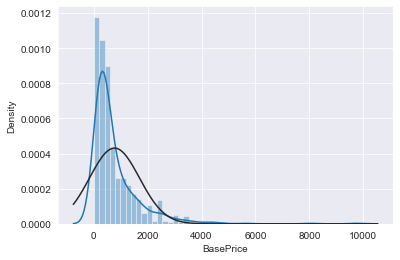

In [ ]:
# ЗАДАНИЕ 2: составить  описательную статистику цен базовых пакетов приложений
import seaborn as sns  # импортируем библиотеку под именем sns
from scipy.stats import norm
sns.distplot(nft_dataset.BasePrice.dropna(), fit=norm) 
# ВЫВОД: большинство приложений стоят в пределах [0, 2000]

<AxesSubplot:xlabel='BasePrice', ylabel='minStorage(GB)'>

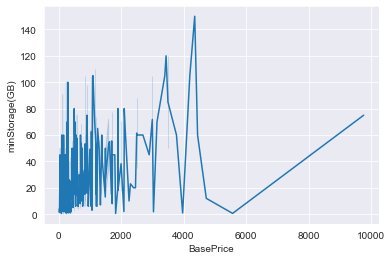

In [ ]:
# ЗАДАНИЕ 3: построить зависимость цены и размера игры
sns.set_style("darkgrid")
sns.lineplot(data = nft_dataset, x = "BasePrice", y = "minStorage(GB)")  # зависимость наличия цены и размера приложения
# Вывод: таковой зависимости нет, т к волатильность графика очень большая

In [ ]:
# ЗАДАНИЕ 4: расщитать корелляции по всем числовым параметрам
nft_dataset.corr()
# ВЫВОД: минимальные требования по ГБ отлично коррелируют с рекомендованными требованиями по ГБ

,BasePrice,PremiumPrice,MiddlePrice,minRAM(GB),minStorage(GB),recRAM(GB),recStorage(GB)
BasePrice,1.000000,0.174929,0.269885,0.149364,0.401000,0.144032,0.432266
PremiumPrice,0.174929,1.000000,0.984235,0.094604,0.073139,0.112690,0.149129
MiddlePrice,0.269885,0.984235,1.000000,0.136942,0.130587,0.150334,0.209882
minRAM(GB),0.149364,0.094604,0.136942,1.000000,0.304166,0.790634,0.335051
minStorage(GB),0.401000,0.073139,0.130587,0.304166,1.000000,0.319228,0.993334
recRAM(GB),0.144032,0.112690,0.150334,0.790634,0.319228,1.000000,0.331280
recStorage(GB),0.432266,0.149129,0.209882,0.335051,0.993334,0.331280,1.000000


<AxesSubplot:>

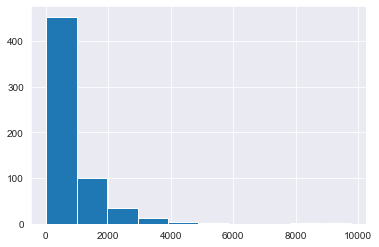

In [ ]:
# ЗАДАНИЕ 5: построить гисограмму мин цен игр (альтернативный график задания 2)
nft_dataset.BasePrice.hist()
# ВЫВОД: большинство приложений стоят в пределах [0, 2000]

<AxesSubplot:title={'center':'minRAM(GB)'}, ylabel='gigabytes'>

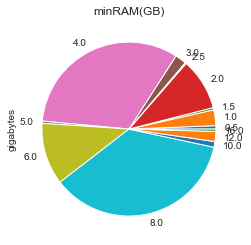

In [ ]:
# ЗАДАЧА 6: построим круговую диаграмму для параметра minRAM(GB)
nft_dataset.groupby('minRAM(GB)').size().plot(kind='pie', title='minRAM(GB)', ylabel='gigabytes')
# ВЫВОД: 4.0 и 8.0 ГБ ОЗУ по популярности преобладают перед другими размерами ОЗУ

<AxesSubplot:xlabel='minRAM(GB)', ylabel='BasePrice'>

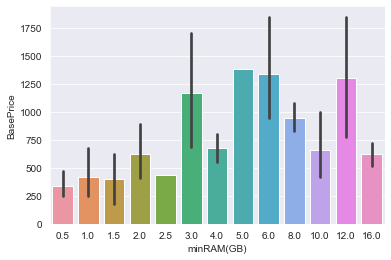

In [ ]:
# ЗАДАЧА 7: сравнение цены игр с различными требованиями ОЗУ
sns.barplot(data=nft_dataset, x="minRAM(GB)", y="BasePrice")
# ВЫВОД: чем меньше у человека ОЗУ, тем дешевле игра и, следовательно, тем более простую игру пользователь может себе позволить с т.з. "железа" своей машины

In [ ]:
# ДАЛЕЕ ИДУТ ИНТЕРАКТИВНЫЕ ГРАФИКИ С ДАННЫМИ ИЗ РАССМАТРИВАЕМОГО ДАТАСЕТА (см след файл)